Sample CSV created: enjoy_sport.csv
     Sky AirTemp Humidity    Wind Water Forecast EnjoySport
0  Sunny    Warm   Normal  Strong  Warm     Same        Yes
1  Sunny    Warm     High  Strong  Warm     Same        Yes
2  Rainy    Cold     High  Strong  Cold   Change         No
3  Sunny    Warm     High  Strong  Cool   Change        Yes
4  Sunny    Cold   Normal    Weak  Warm     Same        Yes
5  Rainy    Cold   Normal  Strong  Cool     Same         No

General Boundary (G-set):
Sky=Sunny

Specific Boundary (S-set):


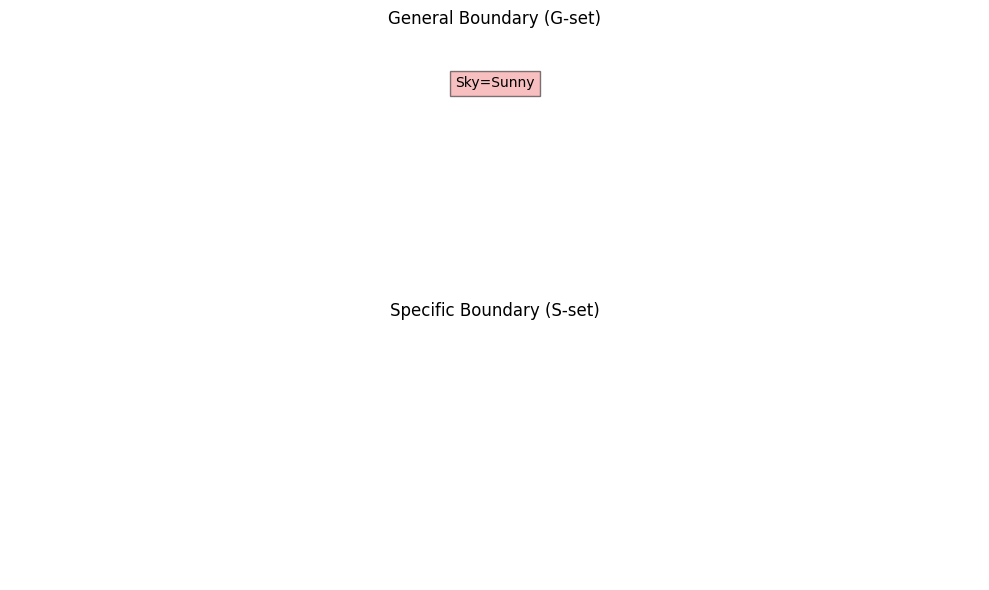


You can download the visualization for your report.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# First, let's create a sample dataset and save it as a CSV
# This is a sample dataset for concept learning with attributes:
# Sky, AirTemp, Humidity, Wind, Water, Forecast, and class EnjoySport

data = {
    'Sky': ['Sunny', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy'],
    'AirTemp': ['Warm', 'Warm', 'Cold', 'Warm', 'Cold', 'Cold'],
    'Humidity': ['Normal', 'High', 'High', 'High', 'Normal', 'Normal'],
    'Wind': ['Strong', 'Strong', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Water': ['Warm', 'Warm', 'Cold', 'Cool', 'Warm', 'Cool'],
    'Forecast': ['Same', 'Same', 'Change', 'Change', 'Same', 'Same'],
    'EnjoySport': ['Yes', 'Yes', 'No', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
df.to_csv('enjoy_sport.csv', index=False)
print("Sample CSV created: enjoy_sport.csv")
print(df)

# Candidate Elimination Algorithm
def candidate_elimination_algorithm(data_path):
    # Read the data
    df = pd.read_csv(data_path)

    # Separate features and target
    X = df.iloc[:, :-1]  # All columns except the last one (class)
    y = df.iloc[:, -1]   # Last column (class)

    # Get the domain values for each attribute
    domains = {}
    for column in X.columns:
        domains[column] = list(X[column].unique())

    # Initialize general and specific boundaries
    num_attributes = len(X.columns)
    G = [['?'] * num_attributes]  # General boundary - initially most general
    S = [['0'] * num_attributes]  # Specific boundary - initially most specific

    # Process each instance
    for idx, instance in X.iterrows():
        instance_values = instance.tolist()
        instance_class = y.iloc[idx]

        # If positive example
        if instance_class == 'Yes':
            # Remove hypothesis from G that don't cover the instance
            G = [g for g in G if covers(g, instance_values)]

            # Update S to be more general
            S_new = []
            for s in S:
                if not covers(s, instance_values):
                    # Make s more general to cover this instance
                    for i in range(num_attributes):
                        if s[i] != instance_values[i] and s[i] != '?':
                            s_new = s.copy()
                            s_new[i] = '?'
                            if not any([more_general_than(g, s_new) for g in G]):
                                S_new.append(s_new)
                else:
                    S_new.append(s)
            S = minimal_generalizations(S_new)

        # If negative example
        else:
            # Remove hypothesis from S that cover the instance
            S = [s for s in S if not covers(s, instance_values)]

            # Update G to be more specific
            G_new = []
            for g in G:
                if covers(g, instance_values):
                    # Make g more specific to not cover this instance
                    for i in range(num_attributes):
                        if g[i] == '?' or g[i] == instance_values[i]:
                            for value in domains[X.columns[i]]:
                                if value != instance_values[i]:
                                    g_new = g.copy()
                                    g_new[i] = value
                                    G_new.append(g_new)
                else:
                    G_new.append(g)
            G = minimal_specializations(G_new)

    # Convert lists to strings for better visualization
    G_str = [' ∧ '.join([f"{X.columns[i]}={g[i]}" if g[i] != '?' else '' for i in range(num_attributes) if g[i] != '?']) for g in G]
    S_str = [' ∧ '.join([f"{X.columns[i]}={s[i]}" if s[i] != '?' else '' for i in range(num_attributes) if s[i] != '?' and s[i] != '0']) for s in S]

    return G_str, S_str, X.columns

# Helper functions
def covers(hypothesis, instance):
    """Check if a hypothesis covers an instance."""
    for i in range(len(hypothesis)):
        if hypothesis[i] != '?' and hypothesis[i] != instance[i]:
            return False
    return True

def more_general_than(g, s):
    """Check if hypothesis g is more general than hypothesis s."""
    for i in range(len(g)):
        if g[i] != '?' and g[i] != s[i] and s[i] != '0':
            return False
    return True

def minimal_generalizations(hypotheses):
    """Remove redundant hypotheses to keep only minimal generalizations."""
    result = []
    for h in hypotheses:
        if not any([more_general_than(other, h) for other in hypotheses if other != h]):
            result.append(h)
    return result

def minimal_specializations(hypotheses):
    """Remove redundant hypotheses to keep only minimal specializations."""
    result = []
    for h in hypotheses:
        if not any([more_general_than(h, other) for other in hypotheses if other != h]):
            result.append(h)
    return result

# Run the algorithm
G, S, feature_names = candidate_elimination_algorithm('enjoy_sport.csv')

print("\nGeneral Boundary (G-set):")
for g in G:
    print(g if g else "True (covers everything)")

print("\nSpecific Boundary (S-set):")
for s in S:
    print(s if s else "False (covers nothing)")

# Visualize the version space
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.axis('off')
plt.title('General Boundary (G-set)')
for i, g in enumerate(G):
    plt.text(0.5, 0.8 - i*0.2, g if g else "True (covers everything)",
             horizontalalignment='center', verticalalignment='center',
             bbox=dict(facecolor='lightcoral', alpha=0.5))

plt.subplot(2, 1, 2)
plt.axis('off')
plt.title('Specific Boundary (S-set)')
for i, s in enumerate(S):
    plt.text(0.5, 0.8 - i*0.2, s if s else "False (covers nothing)",
             horizontalalignment='center', verticalalignment='center',
             bbox=dict(facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.savefig('version_space.png')
plt.show()

print("\nYou can download the visualization for your report.")